In [2]:
import pandas as pd
import os
import chardet
import unicodedata
import datetime

from sklearn.neighbors import NearestCentroid

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
def basic_df_load_and_clean(data_folder, data_file_name, sep = None):
    #this 2 lines allow to retrieve the encoding so that we can open the file
    with open(os.path.join(data_folder, data_file_name), 'rb') as f:
        result = chardet.detect(f.read())

    df = pd.read_csv(os.path.join(data_folder, data_file_name), sep=sep,encoding=result['encoding'])

    # define a helper function to remove accents from text
    def remove_accents(text):
        return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

    #setting all column names into lowercase without accents
    # get the current column names
    old_column_names = df.columns.tolist()

    # remove accents and set to lowercase for each column name
    new_column_names = [remove_accents(name).lower() for name in old_column_names]

    # use the new column names to rename the columns
    df = df.rename(columns=dict(zip(old_column_names, new_column_names)))

    # drop rows that have all Nans
    df = df.dropna(how="all")

    return df

def parse_hour(input):
    if "HO" in input:
        out = input.replace("HO","")
    if "H" in input:
        out = input.replace("H","")
    out = int(out)
    if out == 24:
        out = 0
    return out
def complete_weather_dataframe(folder):
    # getting all filenames
    filenames = [filename for filename in os.listdir(folder)]
    filenames = list(filter(lambda filename: filename != ".DS_Store",
                            filenames))

    # definitive dataframe
    definitive_weather_df = pd.DataFrame()

    #loop through all files
    for filename in filenames:
        # load dataframe
        path = os.path.join(folder, filename)
        df = pd.read_csv(path, sep=";")

        #concatenate it to the definitive dataframe
        definitive_weather_df = pd.concat([definitive_weather_df, df])
    
    return definitive_weather_df

In [229]:
data_folder = "../storage/"
general_weather_file = "raw/general_info/Estaciones_control_datos_meteorologicos.csv"
hist_weather_folder = os.path.join(data_folder, 
                                   "raw/historical_data/weather_data")

hist_weater_file = "raw/historical_data/may_meteo21.csv"
hist_bike_stations = "intermediate/station_plugs_coord_correct.csv"

In [225]:
hist_stations_df = pd.read_csv(os.path.join(data_folder, hist_bike_stations), sep = ",")

In [209]:
hist_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032270 entries, 0 to 7032269
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Unnamed: 0.2        int64  
 1   Unnamed: 0.1        int64  
 2   Unnamed: 0          int64  
 3   activate            float64
 4   name                object 
 5   reservations_count  float64
 6   light               float64
 7   total_bases         float64
 8   free_bases          float64
 9   number              object 
 10  longitude           object 
 11  no_available        float64
 12  address             object 
 13  latitude            object 
 14  dock_bikes          float64
 15  id_station          float64
 16  time                object 
 17  day                 int64  
 18  month               int64  
 19  year                int64  
 20  hour                float64
 21  weekday             int64  
 22  plugs_count         float64
 23  unplugs_count       float64
dtypes: float64(11), int64(7)

# Finding merging mechanism

## Loading data

In [230]:
weather_stations_info = basic_df_load_and_clean(data_folder, general_weather_file, sep = ";")
print("general weather stations data loaded")
#hist_stations_df = basic_df_load_and_clean(data_folder, hist_bike_stations)
print("historical bike stations data loaded")
raw_hist_weather_df = complete_weather_dataframe(hist_weather_folder)
print("historical weather stations data loaded")

general weather stations data loaded
historical bike stations data loaded
historical weather stations data loaded


In [231]:
hist_stations_df

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,activate,name,reservations_count,light,total_bases,free_bases,...,time,day,month,year,hour,weekday,plugs_count,unplugs_count,latitude,longitude
0,0,0,0,0,1.0,Puerta del Sol A,0.0,2.0,30.0,16.0,...,2022-02-01 00:00:00,1,2,2022,0.0,1,0.0,0.0,40.421511,-3.704362
1,1,1,1,1,1.0,Puerta del Sol B,0.0,2.0,30.0,11.0,...,2022-02-01 00:00:00,1,2,2022,0.0,1,0.0,0.0,40.421511,-3.704362
2,2,2,2,2,1.0,Miguel Moya,0.0,1.0,24.0,2.0,...,2022-02-01 00:00:00,1,2,2022,0.0,1,0.0,0.0,40.420589,-3.705842
3,3,3,3,3,1.0,Plaza Conde Suchil,0.0,0.0,18.0,13.0,...,2022-02-01 00:00:00,1,2,2022,0.0,1,0.0,0.0,40.430294,-3.706917
4,4,4,4,4,1.0,Malasaña,0.0,2.0,24.0,13.0,...,2022-02-01 00:00:00,1,2,2022,0.0,1,0.0,0.0,40.428552,-3.702587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7032265,7032265,7032265,7032265,7032265,1.0,Remonta,0.0,1.0,18.0,2.0,...,2019-09-30 23:00:00,30,9,2019,23.0,0,1.0,0.0,40.463028,-3.697333
7032266,7032266,7032266,7032266,7032266,1.0,Plaza de Castilla,0.0,0.0,24.0,20.0,...,2019-09-30 23:00:00,30,9,2019,23.0,0,0.0,0.0,40.466361,-3.688639
7032267,7032267,7032267,7032267,7032267,1.0,Plaza de Castilla 2,0.0,1.0,24.0,6.0,...,2019-09-30 23:00:00,30,9,2019,23.0,0,1.0,2.0,40.453152,-3.670996
7032268,7032268,7032268,7032268,7032268,1.0,Tres Cruces,0.0,0.0,27.0,24.0,...,2019-09-30 23:00:00,30,9,2019,23.0,0,3.0,2.0,40.419674,-3.702673


From historical bike stations information we will want a subset of the dataframe with only 1 row per station, and only the columns id, longitude and magnitude so that we can relate bike stations with weather stations

In [232]:
bike_stations_df = hist_stations_df.groupby("number").first().reset_index()[["number", "longitude", "latitude"]]
bike_stations_df.columns = ["number", "longitud", "latitud"]
bike_stations_df

,number,longitud,latitud
0,10,-3.690129,40.425388
1,100,-3.673840,40.424780
2,101,-3.669152,40.423153
3,102,-3.684023,40.421180
4,103,-3.686530,40.430370
...,...,...,...
261,95,-3.687055,40.422658
262,96,-3.682179,40.422064
263,97,-3.687793,40.415709
264,98,-3.687793,40.415709


In [233]:
weather_stations_info.head()

,codigo,codigo_corto,estacion,direccion,longitud_etrs89,latitud_etrs89,altitud,vv (81),dv (82),t (83),...,cod_via,via_clase,via_par,via_nombre,num_via,coordenada_x_etrs89,coordenada_y_etrs89,longitud,latitud,unnamed: 23
0,28079004.0,4.0,Plaza España,Plaza de España,"3°42'43.91""O","40°25'25.98""N",637.0,NaN,NaN,X,...,273600.0,PLAZA,DE,ESPAÑA,NaN,"439579,3291","4475049,263",-3.712257,40.423882,NaN
1,28079008.0,8.0,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,"3°40'56.22""O","40°25'17.63""N",672.0,NaN,NaN,X,...,18900.0,CALLE,DE,ALCALA,NaN,"442117,2366","4474770,696",-3.682316,40.421553,NaN
2,28079016.0,16.0,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,"3°38'21.17""O","40°26'24.20""N",695.0,NaN,NaN,X,...,798700.0,CALLE,DEL,VIZCONDE DE LOS ASILOS,NaN,"445786,1729","4476796,019",-3.639242,40.440046,NaN
3,28079018.0,18.0,Farolillo,Calle Farolillo - C/Ervigio,"3°43'54.61""O","40°23'41.22""N",632.0,NaN,NaN,X,...,1903.0,CALLE,DEL,FAROLILLO,NaN,"437891,6961","4471832,769",-3.731836,40.394782,NaN
4,28079024.0,24.0,Casa de Campo,Casa de Campo (Terminal del Teleférico),"3°44'50.44""O","40°25'9.69""N",646.0,X,X,X,...,905219.0,CARRETERA,DEL,TELEFERICO,NaN,"436598,5637","4474571,618",-3.747345,40.419358,NaN


In [234]:
weather_stations_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   codigo               26 non-null     float64
 1   codigo_corto         26 non-null     float64
 2   estacion             26 non-null     object 
 3   direccion            26 non-null     object 
 4   longitud_etrs89      26 non-null     object 
 5   latitud_etrs89       26 non-null     object 
 6   altitud              26 non-null     float64
 7   vv (81)              10 non-null     object 
 8   dv (82)              10 non-null     object 
 9   t (83)               25 non-null     object 
 10  hr (86)              23 non-null     object 
 11  pb (87)              8 non-null      object 
 12  rs (88)              8 non-null      object 
 13  p (89)               10 non-null     object 
 14  cod_via              25 non-null     float64
 15  via_clase            26 non-null     objec

The nulls in each magnitude mark the stations that **do not** register that magnitude

In [235]:
bike_stations_df.head()

,number,longitud,latitud
0,10,-3.690129,40.425388
1,100,-3.673840,40.424780
2,101,-3.669152,40.423153
3,102,-3.684023,40.421180
4,103,-3.686530,40.430370


In [236]:
bike_stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   number    266 non-null    object 
 1   longitud  266 non-null    float64
 2   latitud   266 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.4+ KB


## Fixing problems in the general list of weather stations

### Some stations, for some magnitudes, did not have the whole month of data

We have seen that depending on the month, some stations are active and some arent. Also, some dont have all the days of the month registered. So to create the dataframe relating bike stations and weather stations, we will create first a weather stations dataframe with the columns (year, month, station, magnitude) from the historical weather data with all stations per month per year and per magnitude that are registering the whole month. We will use then the information from weather_stations_info_df to add lattitude and longitude to this df. The objective is to know which stations are active and which magnitudes are being measured by each station at each month of each year to then assign the information this stations are gathering to the closest bike stations.

### The weather stations information file is not correct for the magnitudes each station measures

At the same time, the weather_stations_info_df has the wrong information about the magintudes each station measures, and also the magnitudes a station measures can change between months. Possible reasons for this is that a sensor has stopped working or a new sensor has been added. So to know which magnitudes each station is measuring at each moment in time, we will also use the historical weather data.

In [237]:
weather_stations_registering = raw_hist_weather_df[["ESTACION","MAGNITUD","ANO","MES", "DIA"]].groupby(["ESTACION","MAGNITUD","ANO","MES"]).count().reset_index()
weather_stations_registering["time"] =weather_stations_registering.apply(lambda row: datetime.datetime(row["ANO"], row["MES"],1), axis = 1)
weather_stations_registering

,ESTACION,MAGNITUD,ANO,MES,DIA,time
0,4,83,2019,1,31,2019-01-01
1,4,83,2019,2,28,2019-02-01
2,4,83,2019,3,31,2019-03-01
3,4,83,2019,4,30,2019-04-01
4,4,83,2019,5,31,2019-05-01
...,...,...,...,...,...,...
4535,115,86,2022,9,2,2022-09-01
4536,115,86,2023,1,31,2023-01-01
4537,115,86,2023,2,28,2023-02-01
4538,115,86,2023,3,26,2023-03-01


<AxesSubplot: xlabel='time', ylabel='DIA'>

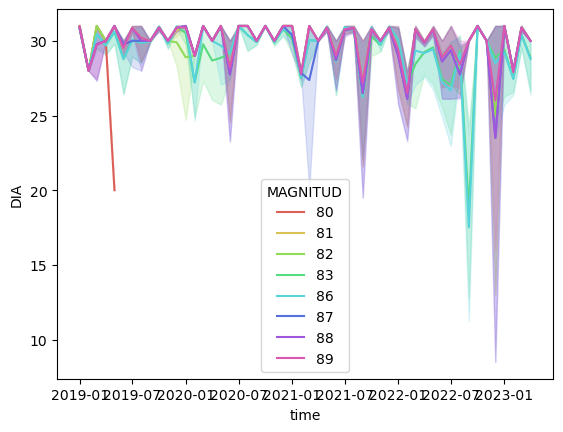

In [238]:
my_palette = sns.color_palette("hls", n_colors=len(list(weather_stations_registering["MAGNITUD"].unique())))

sns.lineplot(data=weather_stations_registering, x="time", y="DIA", hue = "MAGNITUD", palette=my_palette)

In [239]:
# filtering months
# Groups: 1-31 days, 0-30 days, 3-28 or 29 days

days_per_month = {
    1:31,
    2:28,
    3:31,
    4:30,
    5:31,
    6:30,
    7:31,
    8:31,
    9:30,
    10:31,
    11:30,
    12:31
}

weather_stations_registering["month_days"] = weather_stations_registering.apply(lambda row: days_per_month[row["MES"]], axis = 1)
weather_stations_registering

,ESTACION,MAGNITUD,ANO,MES,DIA,time,month_days
0,4,83,2019,1,31,2019-01-01,31
1,4,83,2019,2,28,2019-02-01,28
2,4,83,2019,3,31,2019-03-01,31
3,4,83,2019,4,30,2019-04-01,30
4,4,83,2019,5,31,2019-05-01,31
...,...,...,...,...,...,...,...
4535,115,86,2022,9,2,2022-09-01,30
4536,115,86,2023,1,31,2023-01-01,31
4537,115,86,2023,2,28,2023-02-01,28
4538,115,86,2023,3,26,2023-03-01,31


In [240]:
weather_stations_registering_filtered = weather_stations_registering[weather_stations_registering["month_days"] <= weather_stations_registering["DIA"]]

<AxesSubplot: xlabel='time', ylabel='DIA'>

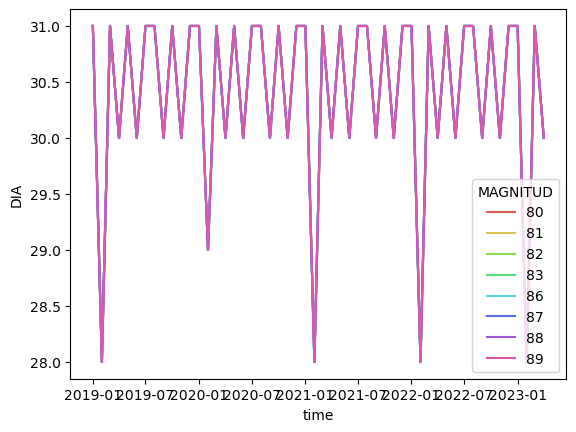

In [241]:
my_palette = sns.color_palette("hls", n_colors=len(list(weather_stations_registering["MAGNITUD"].unique())))

sns.lineplot(data=weather_stations_registering_filtered, x="time", y="DIA", hue = "MAGNITUD", palette=my_palette)

In [242]:
weather_stations_registering_filtered[(weather_stations_registering_filtered["ESTACION"] == 35) & (weather_stations_registering_filtered["ANO"] == 2019)]

,ESTACION,MAGNITUD,ANO,MES,DIA,time,month_days
635,35,83,2019,1,31,2019-01-01,31
636,35,83,2019,2,28,2019-02-01,28
638,35,83,2019,4,30,2019-04-01,30
639,35,83,2019,5,31,2019-05-01,31
640,35,83,2019,6,30,2019-06-01,30
641,35,83,2019,7,31,2019-07-01,31
642,35,83,2019,8,31,2019-08-01,31
643,35,83,2019,9,30,2019-09-01,30
644,35,83,2019,10,31,2019-10-01,31
645,35,83,2019,11,30,2019-11-01,30


In [243]:
weather_stations_registering_filtered = weather_stations_registering_filtered[["ESTACION", "MAGNITUD", "ANO", "MES"]]
hist_weather_filtered = pd.merge(weather_stations_registering_filtered,raw_hist_weather_df, on=["ESTACION", "MAGNITUD", "ANO", "MES"], how="left")

In [244]:
hist_weather_filtered.head()

,ESTACION,MAGNITUD,ANO,MES,PROVINCIA,MUNICIPIO,PUNTO_MUESTREO,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,4,83,2019,1,28,79,28079004_83_98,1,1.1,V,...,8.6,V,6.0,V,3.7,V,2.3,V,1.0,V
1,4,83,2019,1,28,79,28079004_83_98,2,0.7,V,...,8.3,V,4.9,V,3.6,V,2.6,V,0.6,V
2,4,83,2019,1,28,79,28079004_83_98,3,0.0,V,...,8.0,V,5.4,V,3.6,V,2.6,V,1.5,V
3,4,83,2019,1,28,79,28079004_83_98,4,0.7,V,...,8.5,V,5.6,V,2.8,V,2.1,V,0.6,V
4,4,83,2019,1,28,79,28079004_83_98,5,-0.1,V,...,8.3,V,5.2,V,3.2,V,2.1,V,0.8,V


In [245]:
# we add the latitude and longitude to all weather stations in weather_stations_registering_filtered
weather_stations_registering_filtered=pd.merge(weather_stations_registering_filtered, weather_stations_info[["codigo_corto","longitud", "latitud"]], left_on="ESTACION", right_on="codigo_corto")

In [246]:
weather_stations_registering_filtered.head()

,ESTACION,MAGNITUD,ANO,MES,codigo_corto,longitud,latitud
0,4,83,2019,1,4.0,-3.712257,40.423882
1,4,83,2019,2,4.0,-3.712257,40.423882
2,4,83,2019,3,4.0,-3.712257,40.423882
3,4,83,2019,4,4.0,-3.712257,40.423882
4,4,83,2019,5,4.0,-3.712257,40.423882


## Merging mechanism

To merge bike stations and weather stations we are going to use the location. We are going to assign the closest weather station to each bike station, so that weather data is as accurate as possible. We are going to use NearestCentroid, which bassically assigns the closest class to each data point. As this classification is a spatial classification taking into account longitude and latitude, it will be more than enough

IMPORTANT! I have seen that not all stations measure all magnitudes. So the ideal case scenario is to build a merging mechanism for each magnitude, so that each bike station looks for the data of each magnitude in the nearest weather station that measures that magnitude.

### Merging mechanism per each magnitude

In [247]:
"""
81 - VELOCIDAD VIENTO
82 - DIR. DE VIENTO
83 - TEMPERATURA
86 - HUMEDAD RELATIVA
87 - PRESION BARIOMETRICA
88 - RADIACION SOLAR
89 - PRECIPITACIÓN"""
MAGNITUDES = [81, 82, 83, 86, 87, 88, 89]

### Assigning weather station to bike stations for each magnitude

In [249]:
# adding for each magnitude the nearest weather station to each bike station per year per month
classifier = NearestCentroid()

bike_stations_df = bike_stations_df.sort_values("number")
# we have a df of per each month of each year and each mangitude, which stations register the whole month.
# lets assign to those stations the nearest bike station at each moment in time.
coord_bs = bike_stations_df[["latitud", "longitud"]]
relate_ws_bs = pd.DataFrame(columns=["bike_station","longitud","latitud", "ANO", "MES","MAGNITUD", "weather_station"])
i = 0
for year in range(2019,2024):
    for month in range(1,13):

        if year == 2023 and month > 4:
            break
        
        for magnitude in MAGNITUDES:
            i +=1
            #we select the rows of the stations of that month
            weather_stations_registering_magnitude = weather_stations_registering_filtered[(weather_stations_registering_filtered["ANO"] == year) & 
                                             (weather_stations_registering_filtered["MES"] == month) & 
                                             (weather_stations_registering_filtered["MAGNITUD"] == magnitude)]
            
            #we get the coordinates of the stations that measure that specific magnitude
            coord_ws_magnitude = weather_stations_registering_magnitude[["latitud","longitud"]]
        
            weather_stations = weather_stations_registering_magnitude["ESTACION"]
           
            # we fit the model with the stations of this magnitude
            classifier.fit(coord_ws_magnitude, weather_stations)
            # we assign a weather station to each bike station per each magnitude in that moment of time
            ws_for_bs_magnitude = classifier.predict(coord_bs)
            
            bike_stations_df["ESTACION"] = ws_for_bs_magnitude

            # we get the bike station in the weather dataframe. CAREFUL! not all weather stations
            # will have a bike stations BUT all bike stations will have a weather station
            merg = pd.merge(weather_stations_registering_magnitude[["ANO", "MES","MAGNITUD", "ESTACION"]],bike_stations_df, on="ESTACION", how="left")
            # we filter through the weather stations that HAVE a bike station
            merg = merg.loc[~merg["number"].isna(), ["number","longitud","latitud", "ANO", "MES","MAGNITUD", "ESTACION"]]
            
            merg.columns = ["bike_station","longitud","latitud", "ANO", "MES","MAGNITUD", "weather_station"]
            # we put all the information into a final dataframe
            relate_ws_bs = pd.concat([relate_ws_bs, merg])


In [250]:
relate_ws_bs = relate_ws_bs.pivot(index=['ANO', 'MES', 'bike_station',"longitud","latitud"], columns='MAGNITUD', values='weather_station').reset_index()
relate_ws_bs.columns = ['ANO', 'MES', 'bike_station',"longitud","latitud", 'weather_station_81', 'weather_station_82', 
                  'weather_station_83', 'weather_station_86', 'weather_station_87', 'weather_station_88',
                  'weather_station_89']
relate_ws_bs.head()

/var/folders/yw/h9ndkfbx6_lb6gwchxbgts2m0000gn/T/ipykernel_92885/2118942162.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  relate_ws_bs = relate_ws_bs.pivot(index=['ANO', 'MES', 'bike_station',"longitud","latitud"], columns='MAGNITUD', values='weather_station').reset_index()


,ANO,MES,bike_station,longitud,latitud,weather_station_81,weather_station_82,weather_station_83,weather_station_86,weather_station_87,weather_station_88,weather_station_89
0,2019,1,10,-3.690129,40.425388,56,56,8,8,56,107,56
1,2019,1,100,-3.673840,40.424780,107,107,111,111,107,107,107
2,2019,1,101,-3.669152,40.423153,102,102,111,111,102,102,102
3,2019,1,102,-3.684023,40.421180,107,107,8,8,107,107,107
4,2019,1,103,-3.686530,40.430370,107,107,8,8,107,107,107


now we have one weather station per magnitude assigned to each bike station at each moment in time so that we have the most accurate prediction of each weather magnitude possible. Also, we are taking into account only the weather stations that are gathering data.

### Visualizing weather stations

In [251]:
ws_df_filtered_plot = weather_stations_registering_filtered.groupby("codigo_corto").first().reset_index()


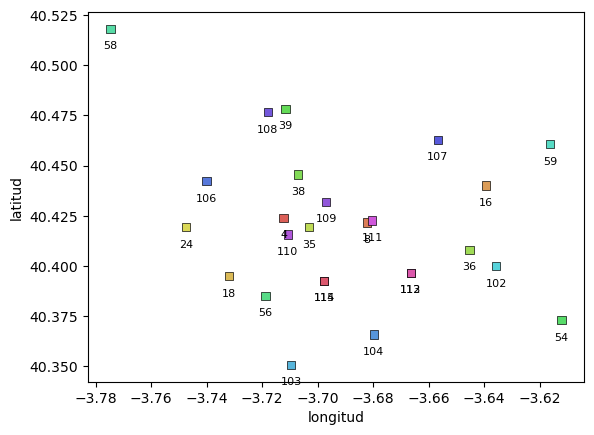

In [252]:
# palette creation with respect to the weather stations that are used for each magnitude
weather_station_codes = ws_df_filtered_plot["codigo_corto"]
my_palette = sns.color_palette("hls", n_colors=len(list(weather_station_codes)))

# scatter plot of the weather stations
ax = sns.scatterplot(data=ws_df_filtered_plot, x="longitud", y="latitud",hue = ws_df_filtered_plot["codigo_corto"], palette=my_palette,
                marker="s", edgecolor="black", alpha=1, legend=None)

for i in range(ws_df_filtered_plot.shape[0]):
        ax.text(ws_df_filtered_plot.iloc[i]["longitud"], ws_df_filtered_plot.iloc[i]["latitud"]-0.01, int(ws_df_filtered_plot.iloc[i]["codigo_corto"]), ha="center", fontsize=8)

### Visualizing assignation of weather stations

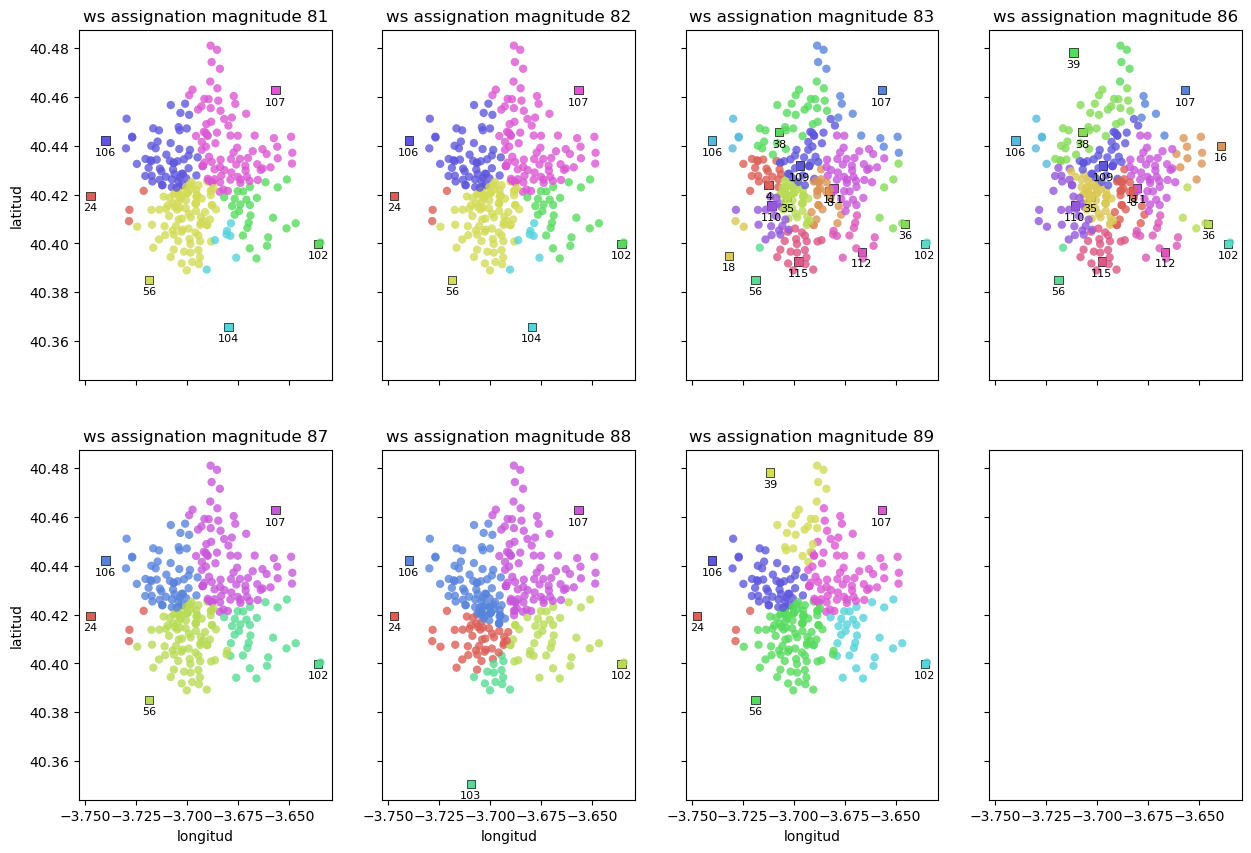

In [253]:
nrows = 2
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10),sharex=True, sharey=True)

relate_ws_bs_plot = relate_ws_bs[(relate_ws_bs["ANO"] == 2021) & (relate_ws_bs["MES"] == 5)]

for index, magnitude in enumerate(MAGNITUDES):
    # this is to build the rows and columns of the subplot
    if index < ncols:
        row = 0
        col = index
    else:
        row = 1
        col = index - ncols

    # palette creation with respect to the weather stations that are used for each magnitude
    weather_station_codes = relate_ws_bs_plot["weather_station_" + str(magnitude)].unique()
    my_palette = sns.color_palette("hls", n_colors=len(list(weather_station_codes)))

    # subsample of the weather stations that register this specific magnitude
    ws_df_aux = weather_stations_registering_filtered.loc[(weather_stations_registering_filtered["codigo_corto"].isin(relate_ws_bs_plot["weather_station_" + str(magnitude)])) &
                                   (weather_stations_registering_filtered["ANO"] == 2021) & (weather_stations_registering_filtered["MES"] == 5),["longitud", "latitud", "codigo_corto"]]
    # scatter plot of the weather stations
    ws_df_aux = ws_df_aux.groupby("codigo_corto").first().reset_index()
    sns.scatterplot(data=ws_df_aux, x="longitud", y="latitud",hue = ws_df_aux["codigo_corto"], palette=my_palette,
                    marker="s", edgecolor="black", alpha=1, legend=None, ax=axes[row, col])
    
    # inserting labels to weather stations to know the code of each one
    for i in range(ws_df_aux.shape[0]):
        axes[row, col].text(ws_df_aux.iloc[i]["longitud"], 
                            ws_df_aux.iloc[i]["latitud"]-0.006, 
                            int(ws_df_aux.iloc[i]["codigo_corto"]), 
                            ha="center", fontsize=8)

    # subsample of the bike stations to get the weather station codes assigned for this magnitude
    bs_df_aux = relate_ws_bs_plot[["longitud", "latitud", "weather_station_" + str(magnitude)]]
    # scatter plot of the bike stations
    sns.scatterplot(data=bs_df_aux, x="longitud", y="latitud",hue = bs_df_aux["weather_station_" + str(magnitude)],palette= my_palette,
                    marker="o", edgecolor="none", alpha=0.8, legend=None, ax=axes[row, col])
    
    # settint titles to the subplots
    axes[row,col].set(title="ws assignation magnitude " + str(magnitude))


This plot represents for each magnitude which is the weather station assigned to each bike station. FOR MAY 2021.

Weather stations are squares, bike stations circles, and all bike stations assigned to a weather station share color with the weather station.

# Processing weather data

In [254]:
hist_weather_filtered.head()

,ESTACION,MAGNITUD,ANO,MES,PROVINCIA,MUNICIPIO,PUNTO_MUESTREO,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,4,83,2019,1,28,79,28079004_83_98,1,1.1,V,...,8.6,V,6.0,V,3.7,V,2.3,V,1.0,V
1,4,83,2019,1,28,79,28079004_83_98,2,0.7,V,...,8.3,V,4.9,V,3.6,V,2.6,V,0.6,V
2,4,83,2019,1,28,79,28079004_83_98,3,0.0,V,...,8.0,V,5.4,V,3.6,V,2.6,V,1.5,V
3,4,83,2019,1,28,79,28079004_83_98,4,0.7,V,...,8.5,V,5.6,V,2.8,V,2.1,V,0.6,V
4,4,83,2019,1,28,79,28079004_83_98,5,-0.1,V,...,8.3,V,5.2,V,3.2,V,2.1,V,0.8,V


In [255]:
hist_weather_filtered.groupby(["ESTACION", "MAGNITUD", "ANO", "MES"]).count()["DIA"].unique()

array([31, 28, 30, 29])

In [256]:
melted_df = pd.melt(hist_weather_filtered, id_vars=['ESTACION', 'MAGNITUD', 'PUNTO_MUESTREO', 'ANO', 'MES', 'DIA'],
                        value_vars=['H{:02d}'.format(hour) for hour in range(1, 25)],
                        var_name='HORA', value_name='CANTIDAD')

melted_df

,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,HORA,CANTIDAD
0,4,83,28079004_83_98,2019,1,1,H01,1.1
1,4,83,28079004_83_98,2019,1,2,H01,0.7
2,4,83,28079004_83_98,2019,1,3,H01,0.0
3,4,83,28079004_83_98,2019,1,4,H01,0.7
4,4,83,28079004_83_98,2019,1,5,H01,-0.1
...,...,...,...,...,...,...,...,...
2972275,115,86,28079115_86_98,2023,4,26,H24,24.0
2972276,115,86,28079115_86_98,2023,4,27,H24,32.0
2972277,115,86,28079115_86_98,2023,4,28,H24,30.0
2972278,115,86,28079115_86_98,2023,4,29,H24,37.0


In [257]:
final_hist_weather = pd.DataFrame(columns=melted_df.columns)
final_hist_weather.insert(0, "bike_station", None)


for year in range(2019,2024):

    aux_year = pd.DataFrame(columns=melted_df.columns)
    aux_year.insert(0, "bike_station", None)

    for month in range(1,13):
        print(f"year: {year}, month: {month}")
        if year == 2023 and month > 4:
            break

        aux_month = pd.DataFrame(columns=melted_df.columns)
        aux_month.insert(0, "bike_station", None)
        
        for magnitude in MAGNITUDES:
            bs_df_column = "weather_station_" + str(magnitude)
            # we get the assigned weather stations for each magnitude (we don't need the rest)
            magnitude_stations = relate_ws_bs.loc[(relate_ws_bs["ANO"]==year) & (relate_ws_bs["MES"]==month),bs_df_column].unique()
            # we filter historical weather station data with the assigned codes
            hist_weather_magnitude_stations = melted_df[(melted_df["ANO"]==year) &
                                             (melted_df["MES"]==month)&
                                             (melted_df["MAGNITUD"]==magnitude)&
                                             (melted_df["ESTACION"].isin(magnitude_stations))]
            # we subset the bike stations information df so that we only merge the current magnitude to the hist weather df
            bs_df_magnitude = relate_ws_bs.loc[(relate_ws_bs["ANO"]==year) & (relate_ws_bs["MES"]==month),["bike_station", bs_df_column]]
            
            # we merge the weather station to each bike station for each moment in time and for each magnitude, as depending
            # on this information each bike station will get the information from one weather station or another
            aux = bs_df_magnitude.merge(hist_weather_magnitude_stations, how = "left", right_on= ["ESTACION"], left_on=bs_df_column)
            aux = aux.drop(bs_df_column, axis = 1)
            
            aux_month = pd.concat([aux_month, aux])
        aux_year = pd.concat([aux_year, aux_month])
    final_hist_weather = pd.concat([final_hist_weather, aux_year])
final_hist_weather.head()

year: 2019, month: 1
year: 2019, month: 2
year: 2019, month: 3
year: 2019, month: 4
year: 2019, month: 5
year: 2019, month: 6
year: 2019, month: 7
year: 2019, month: 8
year: 2019, month: 9
year: 2019, month: 10
year: 2019, month: 11
year: 2019, month: 12
year: 2020, month: 1
year: 2020, month: 2
year: 2020, month: 3
year: 2020, month: 4
year: 2020, month: 5
year: 2020, month: 6
year: 2020, month: 7
year: 2020, month: 8
year: 2020, month: 9


: 

: 

In [52]:
final_hist_weather = final_hist_weather.pivot_table(index=['bike_station', 'ANO', 'MES', 'DIA', 'HORA'], columns='MAGNITUD', values='CANTIDAD').reset_index()
final_hist_weather

MAGNITUD,bike_station,ANO,MES,DIA,HORA,81,82,83,86,87,88,89
0,1.0,2019,1,1,H01,0.68,48.0,6.2,58.0,959.0,1.0,0.0
1,1.0,2019,1,1,H02,0.69,32.0,6.2,56.0,959.0,1.0,0.0
2,1.0,2019,1,1,H03,0.70,43.0,4.8,61.0,959.0,1.0,0.0
3,1.0,2019,1,1,H04,0.70,74.0,4.3,64.0,959.0,1.0,0.0
4,1.0,2019,1,1,H05,0.66,67.0,4.6,62.0,959.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10017211,270.0,2023,4,30,H20,1.78,1.0,23.6,29.0,939.0,161.0,0.0
10017212,270.0,2023,4,30,H21,1.75,14.0,22.3,30.0,939.0,53.0,0.0
10017213,270.0,2023,4,30,H22,1.72,1.0,21.1,32.0,939.0,2.0,0.0
10017214,270.0,2023,4,30,H23,1.85,9.0,19.8,35.0,940.0,1.0,0.0


In [53]:
#parsing the hours from HO1 to 1
final_hist_weather["HORA"] = final_hist_weather["HORA"].apply(parse_hour)

In [54]:
final_hist_weather[(final_hist_weather["DIA"] == 1) & (final_hist_weather["HORA"] == 1) & (final_hist_weather["bike_station"] == 1)]

MAGNITUD,bike_station,ANO,MES,DIA,HORA,81,82,83,86,87,88,89
0,1.0,2019,1,1,1,0.68,48.0,6.2,58.0,959.0,1.0,0.0
744,1.0,2019,2,1,1,2.24,203.0,9.3,97.0,927.0,1.0,0.4
1416,1.0,2019,3,1,1,0.72,77.0,10.0,56.0,955.0,1.0,0.0
2160,1.0,2019,4,1,1,1.35,69.0,10.3,79.0,943.0,1.0,0.0
2880,1.0,2019,5,1,1,0.65,254.0,20.0,31.0,944.0,1.0,0.0
3624,1.0,2019,6,1,1,0.78,97.0,25.2,21.0,948.0,1.0,0.0
4344,1.0,2019,7,1,1,0.00,0.0,31.6,24.0,0.0,1.0,0.0
5088,1.0,2019,8,1,1,1.84,97.0,26.0,52.0,943.0,1.0,0.0
5832,1.0,2019,9,1,1,0.60,308.0,26.7,44.0,945.0,1.0,0.0
6552,1.0,2019,10,1,1,0.53,65.0,22.7,24.0,945.0,1.0,0.0


In [55]:
# station codes in the analyzed subsample
codes_in_subsample = raw_hist_weather_df["ESTACION"].unique()

In [56]:
# station codes in the stations list
all_codes = list(weather_stations_info["codigo_corto"].astype(int))

In [57]:
# stations that are registering data but are not listed in the general list.
# if this list is not empty, it would be a problem
[code for code in codes_in_subsample if code not in all_codes]

[]

In [58]:
# stations that exist in the general list but are not registering data. Maybe they are old stations that
# have been removed for some reason.
[code for code in all_codes if code not in codes_in_subsample]

[]

# Merging with merged trips and stations data

To merge, we will use the id_station column that is by construction the same for historical weather data and for historical tris and stations data

In [59]:
hist_stations_df.head()

,activate,reservations_count,light,no_available,dock_bikes,total_bases,free_bases,id_station,longitude,latitude,time,year,month,day,hour,plugs_count,unplugs_count
0,1.0,0.0,2.0,0.0,14.0,30.0,13.0,1,-3.701834,40.417214,2021-05-01 00:00:00,2021,5,1,0,0.0,0.0
1,1.0,0.0,1.0,0.0,24.0,30.0,5.0,2,-3.701603,40.417313,2021-05-01 00:00:00,2021,5,1,0,0.0,0.0
2,1.0,0.0,0.0,0.0,5.0,24.0,17.0,3,-3.705842,40.420589,2021-05-01 00:00:00,2021,5,1,0,0.0,0.0
3,1.0,0.0,2.0,0.0,11.0,18.0,6.0,4,-3.706917,40.430294,2021-05-01 00:00:00,2021,5,1,0,0.0,0.0
4,1.0,0.0,2.0,0.0,12.0,24.0,10.0,5,-3.702587,40.428552,2021-05-01 00:00:00,2021,5,1,0,0.0,0.0


In [60]:
final_hist_weather.head()

MAGNITUD,bike_station,ANO,MES,DIA,HORA,81,82,83,86,87,88,89
0,1.0,2019,1,1,1,0.68,48.0,6.2,58.0,959.0,1.0,0.0
1,1.0,2019,1,1,2,0.69,32.0,6.2,56.0,959.0,1.0,0.0
2,1.0,2019,1,1,3,0.70,43.0,4.8,61.0,959.0,1.0,0.0
3,1.0,2019,1,1,4,0.70,74.0,4.3,64.0,959.0,1.0,0.0
4,1.0,2019,1,1,5,0.66,67.0,4.6,62.0,959.0,1.0,0.0


In [61]:
final_hist_weather.columns = ["id_station", "year", "month", "day", "hour", 81,82,83,86,87,88,89]
final_hist_weather.head()


,id_station,year,month,day,hour,81,82,83,86,87,88,89
0,1.0,2019,1,1,1,0.68,48.0,6.2,58.0,959.0,1.0,0.0
1,1.0,2019,1,1,2,0.69,32.0,6.2,56.0,959.0,1.0,0.0
2,1.0,2019,1,1,3,0.70,43.0,4.8,61.0,959.0,1.0,0.0
3,1.0,2019,1,1,4,0.70,74.0,4.3,64.0,959.0,1.0,0.0
4,1.0,2019,1,1,5,0.66,67.0,4.6,62.0,959.0,1.0,0.0


### Visualizing

#### Visualizing whole dataframe

In [74]:
plot_mean_magnitudes=final_hist_weather[
    ["year", "month", "day", "hour", 81,82,83,86,87,88,89]
    ].groupby(["year", "month"]).mean().reset_index()
plot_mean_magnitudes["datetime"] = plot_mean_magnitudes.apply(lambda row: datetime.date(int(row["year"]), int(row["month"]),1), axis = 1)

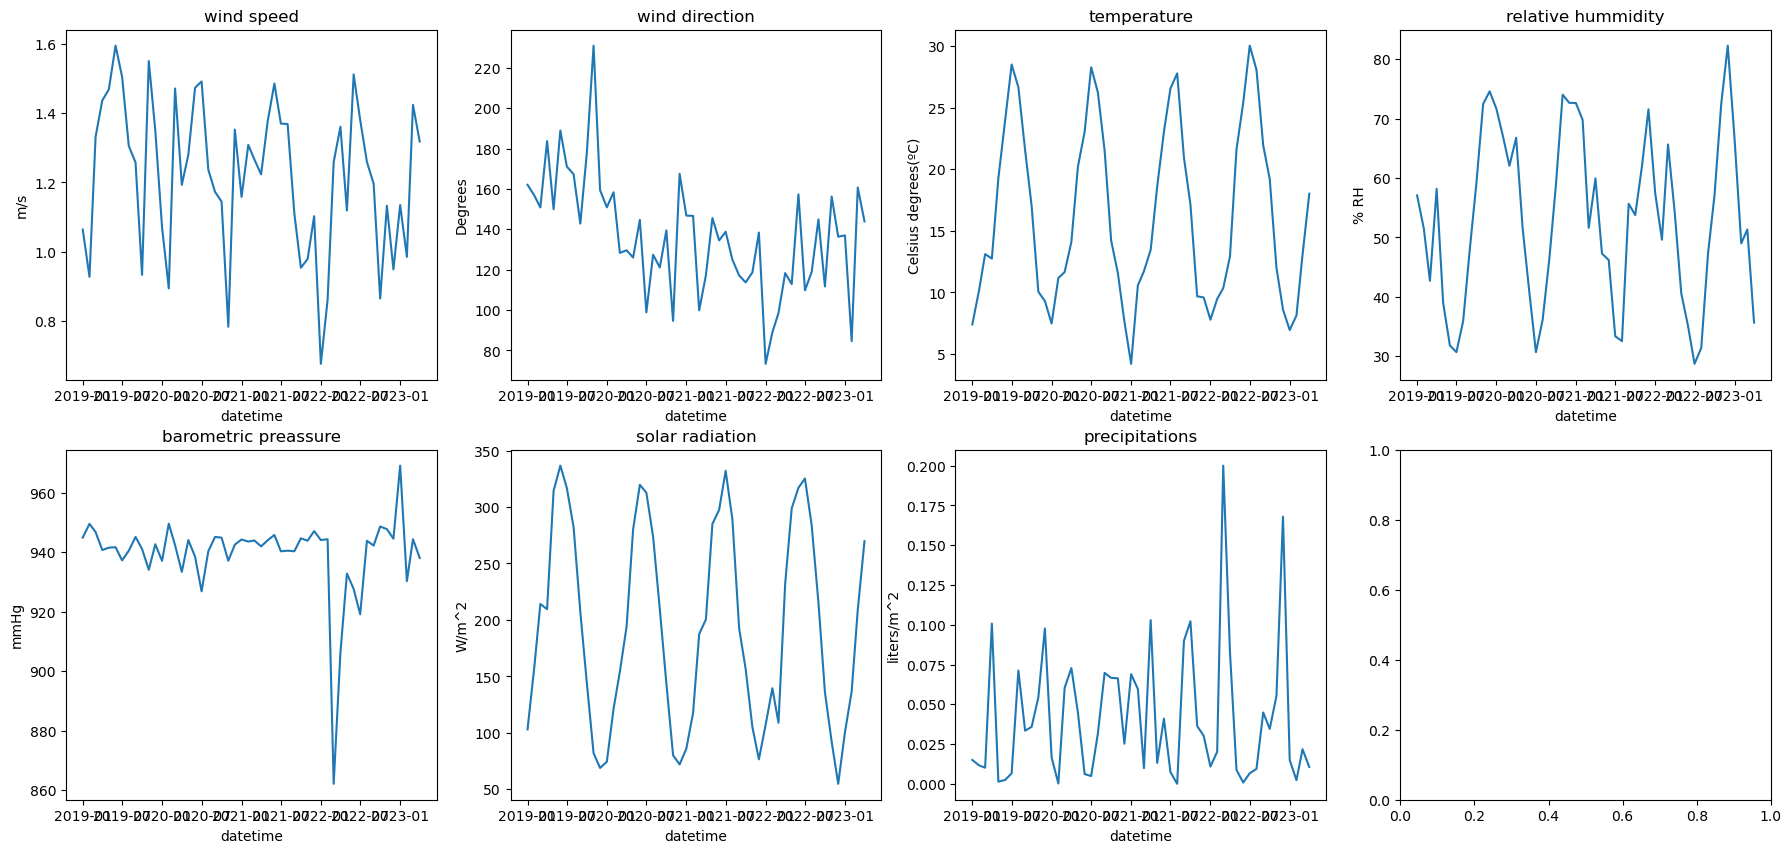

In [77]:
nrows = 2
ncols = 4

magnitude_dict = {
    81: {"name": "wind speed",
         "units": "m/s"},
    82: {"name": "wind direction",
         "units": "Degrees"},
    83: {"name": "temperature",
         "units": "Celsius degrees(ºC)"},
    86: {"name": "relative hummidity",
         "units": "% RH"},
    87: {"name": "barometric preassure",
         "units": "mmHg"},
    88: {"name": "solar radiation",
         "units": "W/m^2"},
    89: {"name": "precipitations",
         "units": "liters/m^2"},
}


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 10))


for index, magnitude in enumerate(MAGNITUDES):
    # this is to build the rows and columns of the subplot
    if index < ncols:
        row = 0
        col = index
    else:
        row = 1
        col = index - ncols

    sns.lineplot(data=plot_mean_magnitudes, x="datetime", y=magnitude, ax=axes[row, col])
    
    
    # setting titles and units to the subplots
    axes[row,col].set(title=magnitude_dict.get(magnitude).get("name"), ylabel=magnitude_dict.get(magnitude).get("units"))

#### Visualizing only 2022

In [87]:
plot_mean_magnitudes=final_hist_weather[
    ["year", "month", "day", "hour", 81,82,83,86,87,88,89]
    ].groupby(["year", "month", "day"]).mean().reset_index()
plot_mean_magnitudes["datetime"] = plot_mean_magnitudes.apply(lambda row: datetime.date(int(row["year"]), int(row["month"]),int(row["day"])), axis = 1)

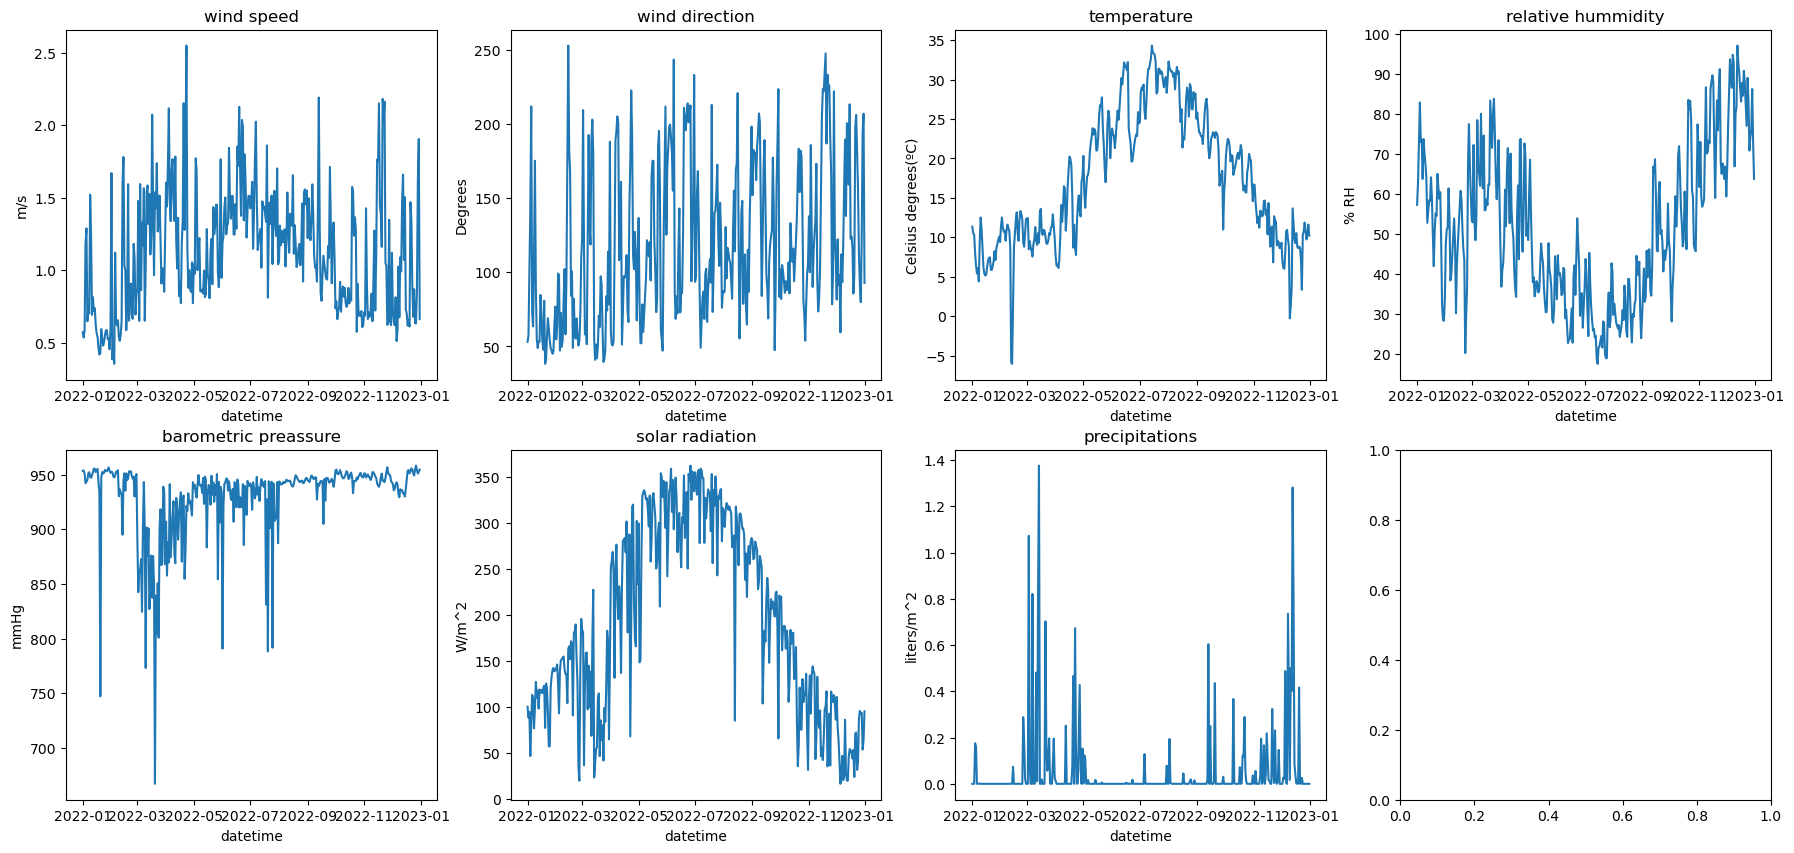

In [88]:
nrows = 2
ncols = 4
plot_mean_magnitudes = plot_mean_magnitudes[plot_mean_magnitudes["year"] == 2022]
magnitude_dict = {
    81: {"name": "wind speed",
         "units": "m/s"},
    82: {"name": "wind direction",
         "units": "Degrees"},
    83: {"name": "temperature",
         "units": "Celsius degrees(ºC)"},
    86: {"name": "relative hummidity",
         "units": "% RH"},
    87: {"name": "barometric preassure",
         "units": "mmHg"},
    88: {"name": "solar radiation",
         "units": "W/m^2"},
    89: {"name": "precipitations",
         "units": "liters/m^2"},
}


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 10))


for index, magnitude in enumerate(MAGNITUDES):
    # this is to build the rows and columns of the subplot
    if index < ncols:
        row = 0
        col = index
    else:
        row = 1
        col = index - ncols

    sns.lineplot(data=plot_mean_magnitudes, x="datetime", y=magnitude, ax=axes[row, col])
    
    
    # setting titles and units to the subplots
    axes[row,col].set(title=magnitude_dict.get(magnitude).get("name"), ylabel=magnitude_dict.get(magnitude).get("units"))

#### Visualizing only may 2021

In [ ]:
hist_stations_weather_may = pd.merge(hist_stations_df, final_hist_weather, on=["id_station","year","month","day","hour"], how="left")
hist_stations_weather_may

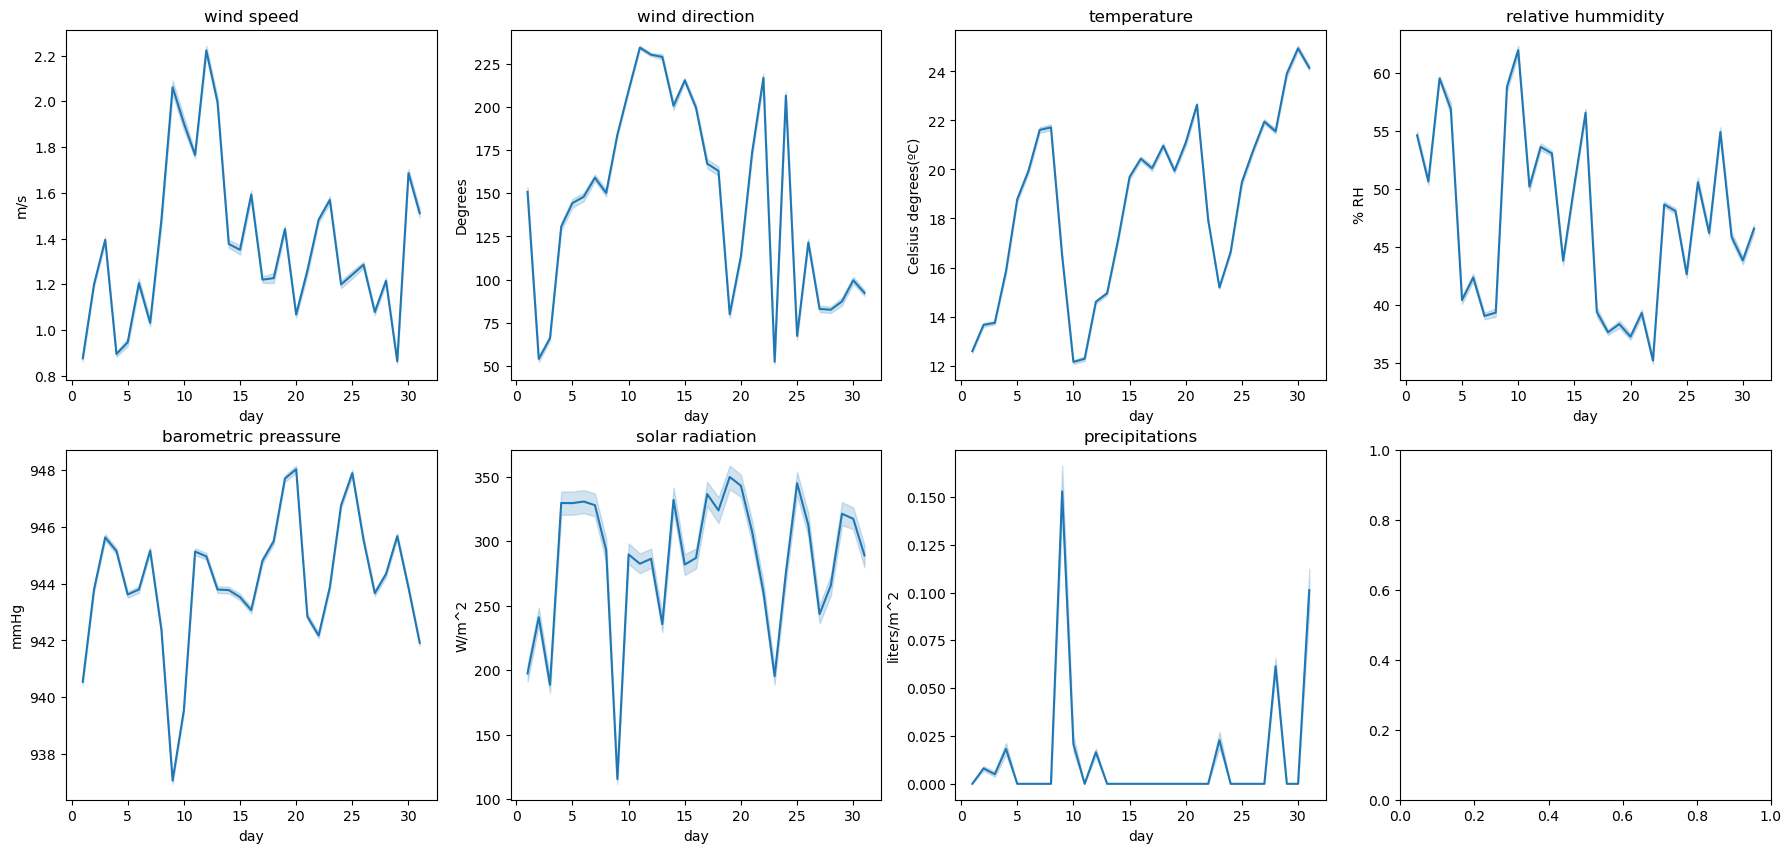

In [78]:
nrows = 2
ncols = 4

magnitude_dict = {
    81: {"name": "wind speed",
         "units": "m/s"},
    82: {"name": "wind direction",
         "units": "Degrees"},
    83: {"name": "temperature",
         "units": "Celsius degrees(ºC)"},
    86: {"name": "relative hummidity",
         "units": "% RH"},
    87: {"name": "barometric preassure",
         "units": "mmHg"},
    88: {"name": "solar radiation",
         "units": "W/m^2"},
    89: {"name": "precipitations",
         "units": "liters/m^2"},
}


fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 10))


for index, magnitude in enumerate(MAGNITUDES):
    # this is to build the rows and columns of the subplot
    if index < ncols:
        row = 0
        col = index
    else:
        row = 1
        col = index - ncols

    sns.lineplot(data=hist_stations_weather_may, x="day", y=magnitude, ax=axes[row, col])
    
    
    # setting titles and units to the subplots
    axes[row,col].set(title=magnitude_dict.get(magnitude).get("name"), ylabel=magnitude_dict.get(magnitude).get("units"))

### Saving file

In [ ]:
#hist_stations_weather.to_csv(os.path.join(data_folder, "historical_data/202105_merged_weather_trips_stations.csv"), index=False)